<a href="https://colab.research.google.com/github/RussAbbott/Softmax/blob/main/Softmax.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from math import exp
def softmax(z, fn):
    '''Return the "pseudo-softmax" of a vector z.'''
    # Apply fn to the elements of z
    fn_z = [round(fn(x), 2) for x in z]
    # Take the sum of those values.
    sum_z = sum(fn_z)
    # Divide each value by that sum and round to two decimal places.
    softmax_z = [round(x/sum_z, 2) for x in fn_z]
    # Return the resulting arrays.
    return fn_z, softmax_z

z = list(range(-3, 5))
print(f'{z = }\n')
def neg_exp(x): return exp(-x)
def sqr(x): return x*x
def id(x): return x
def pow9(x): return 9**x
for fn in [neg_exp, sqr, id, exp, pow9]:
    # When fn = exp, we get traditional softmax
    fn_z, sftmax = softmax(z, fn)
    print(f'{fn.__name__ = }\n{fn_z = }\n{sftmax}\n')

z = [-3, -2, -1, 0, 1, 2, 3, 4]

fn.__name__ = 'neg_exp'
fn_z = [20.09, 7.39, 2.72, 1.0, 0.37, 0.14, 0.05, 0.02]
[0.63, 0.23, 0.09, 0.03, 0.01, 0.0, 0.0, 0.0]

fn.__name__ = 'id'
fn_z = [-3, -2, -1, 0, 1, 2, 3, 4]
[-0.75, -0.5, -0.25, 0.0, 0.25, 0.5, 0.75, 1.0]

fn.__name__ = 'sqr'
fn_z = [9, 4, 1, 0, 1, 4, 9, 16]
[0.2, 0.09, 0.02, 0.0, 0.02, 0.09, 0.2, 0.36]

fn.__name__ = 'exp'
fn_z = [0.05, 0.14, 0.37, 1.0, 2.72, 7.39, 20.09, 54.6]
[0.0, 0.0, 0.0, 0.01, 0.03, 0.09, 0.23, 0.63]

fn.__name__ = 'pow9'
fn_z = [0.0, 0.01, 0.11, 1, 9, 81, 729, 6561]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.01, 0.1, 0.89]




type(ticks) = <class 'numpy.ndarray'>, type(labels) = <class 'list'>
type(new_ticks) = <class 'numpy.ndarray'>, type(new_labels) = <class 'list'>



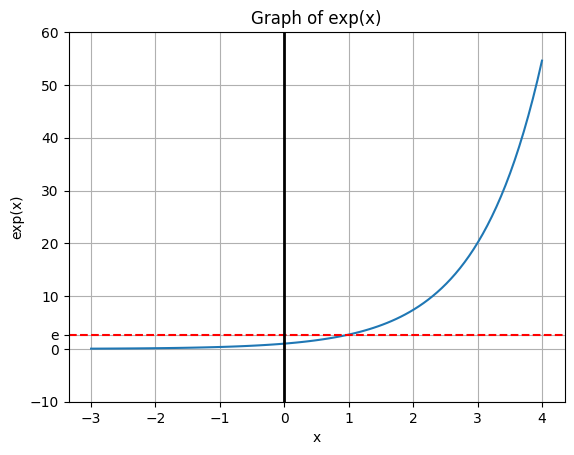

In [11]:
# Draw exp(x) with x between -3 and 4

import matplotlib.pyplot as plt
import numpy as np

# Generate x values in the range -3 to 4
x = np.linspace(-3, 4, 100)

# Calculate the corresponding y values using exp(x)
y = np.exp(x)

# Create the plot
plt.plot(x, y)

# Set the title and labels
plt.title("Graph of exp(x)")
plt.xlabel("x")
plt.ylabel("exp(x)")

# Add gridlines
plt.grid(True)

# Add horizontal line at y = e
plt.axhline(y=np.e, color='red', linestyle='--')

# Add 'e' as label
# Get current y-tick locations and labels
ticks, labels = plt.yticks()

# Note that ticks is of type numpy.ndarray and labels is of type list.
print(f'\n{type(ticks) = }, {type(labels) = }')

# Add a new tick and new label at e
# Add the new tick.
# ( np.append() does not append in place like Python.  )
new_ticks = np.append(ticks, np.e)
# Using np.append on labels will return a numpy ndarray
# new_labels = np.append(labels, 'e')
# Instead, add a new label at e with list concatenation.
# Could also do it with labels.append('e'), which modifies the original list.
new_labels = labels + ['e']
print(f'{type(new_ticks) = }, {type(new_labels) = }\n')

# list concatenation doesn't work as I had expected on numpy.ndarrays.
# Instead of concatenation, it does array arithmetic. (See example below.)
# new_ticks = ticks + [np.e]

# Set the new tick locations and labels
plt.yticks(new_ticks, labels=new_labels)

# Draw a bold line at x = 0
plt.axvline(x=0, color='black', linewidth=2)

# Display the plot
plt.show()

In [13]:
import gensim.downloader

model = gensim.downloader.load('glove-wiki-gigaword-50')


[==================================================] 100.0% 66.0/66.0MB downloaded


In [19]:
# Much of this was written with the help of Gemini.

from math import floor

def show_most_similar(word_or_vec, min_similarity=0.75):
    '''
    The argument can be either a word or a list (a vector embedding).
    Must access the vocabulary differently for words vs vectors.

    Don't know why colab generates errors. The code runs as expected.
    '''
    most_similar = model.most_similar(word_or_vec) if type(word_or_vec) == str else \
                   model.most_similar(positive=[word_or_vec])
    print('\n', word_or_vec if type(word_or_vec) == str else 'a vector',
          [f'{w}: {floor(round(100*sim, 0))}' for w, sim in most_similar if sim >= min_similarity])

# model[<word>] returns the word's embedding as an numpy.ndarray, which supports array arithmetic.
soccer_minus_ball_plus_puck = model['soccer'] - model['ball'] + model['puck']

# Example of array arithmetic.
print(f'{np.array([1, 2, 3, 4]) - np.array([5, 4, 3, 2]) + np.array([9, 9, 9, 9]) = }')

for w_or_v in ['cat', 'dog', 'tower', 'car', 'baby', 'banana', 'pear', 'apple', 'blackberry', soccer_minus_ball_plus_puck]:
    show_most_similar(w_or_v)

# Find other words similar to 'apple'. Still no fruits.
show_most_similar('apple', min_similarity=0)


np.array([1, 2, 3, 4]) - np.array([5, 4, 3, 2]) + np.array([9, 9, 9, 9]) = array([ 5,  7,  9, 11])

 cat ['dog: 92', 'rabbit: 85', 'monkey: 80', 'rat: 79', 'cats: 79', 'snake: 78', 'dogs: 78', 'pet: 78', 'mouse: 77', 'bite: 77']

 dog ['cat: 92', 'dogs: 85', 'horse: 79', 'puppy: 78', 'pet: 77', 'rabbit: 77']

 tower ['towers: 88', 'gate: 79', 'building: 79', 'built: 78', 'roof: 78']

 car ['truck: 92', 'cars: 89', 'vehicle: 88', 'driver: 85', 'driving: 84', 'bus: 82', 'vehicles: 82', 'parked: 79', 'motorcycle: 79', 'taxi: 78']

 baby ['babies: 84', 'boy: 80', 'girl: 79', 'newborn: 78', 'pregnant: 77', 'mom: 76', 'child: 76', 'toddler: 76', 'mother: 75']

 banana ['bananas: 82', 'coconut: 79', 'pineapple: 76', 'mango: 76']

 pear ['mango: 85', 'avocado: 80', 'pineapple: 80', 'pomegranate: 80', 'apricot: 79', 'plum: 79', 'peach: 79', 'tomato: 78', 'almond: 77', 'guava: 77']

 apple ['blackberry: 75']

 blackberry ['iphone: 75', 'apple: 75', 'smartphone: 75']

 a vector ['hockey: 75']

 a